In [5]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
def acc(bigdata): 
    n_iters = 20
    sr = 0
    for i in range(n_iters):
        Y = bigdata['Type']
        X = bigdata.drop(columns = 'Type')
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        model = RandomForestClassifier()
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        model.fit(X_train, y_train)
        sr += accuracy_score(y_test, model.predict(X_test))
    return sr / n_iters

### Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [7]:
data = pd.read_csv('glass.csv')

In [8]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Проведите первичный анализ.
### а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [9]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
data.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


## Вывод: классы распределены неравномерно. Явный перевес по количеству в сторону первого и второго по сравнению с остальными. Наверное, стоило бы заполнить самостоятельно данные для недостающих по количеству классов для увеличения точности модели

In [11]:
### Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
### Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
### Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [16]:
acc(data)

0.7639534883720929

## Обработайте выбросы в данных.
### Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

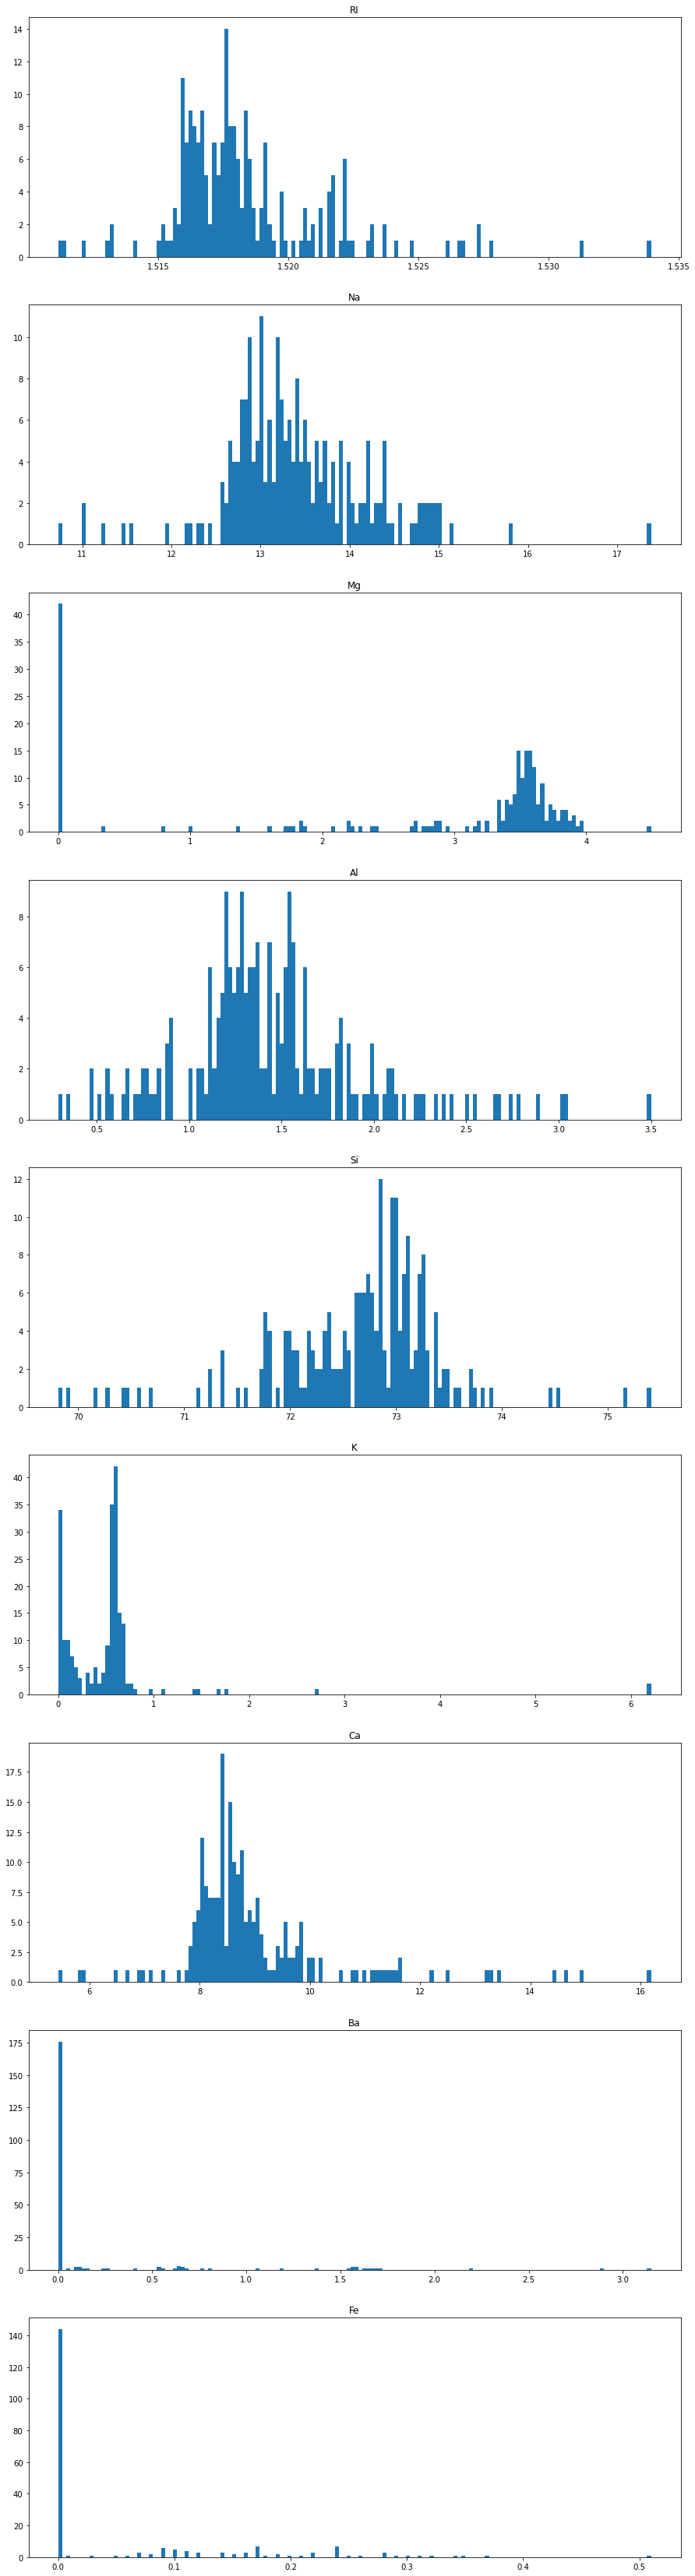

In [235]:
j = 1
plt.figure(figsize=(15, 60))
for i in data.columns[:-1]:
    plt.subplot(9, 1, j)
    plt.title(i)
    plt.hist(data[i], bins = 150)
    j += 1

## Исследуйте признаки на выбросы несколькими способами.
### Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

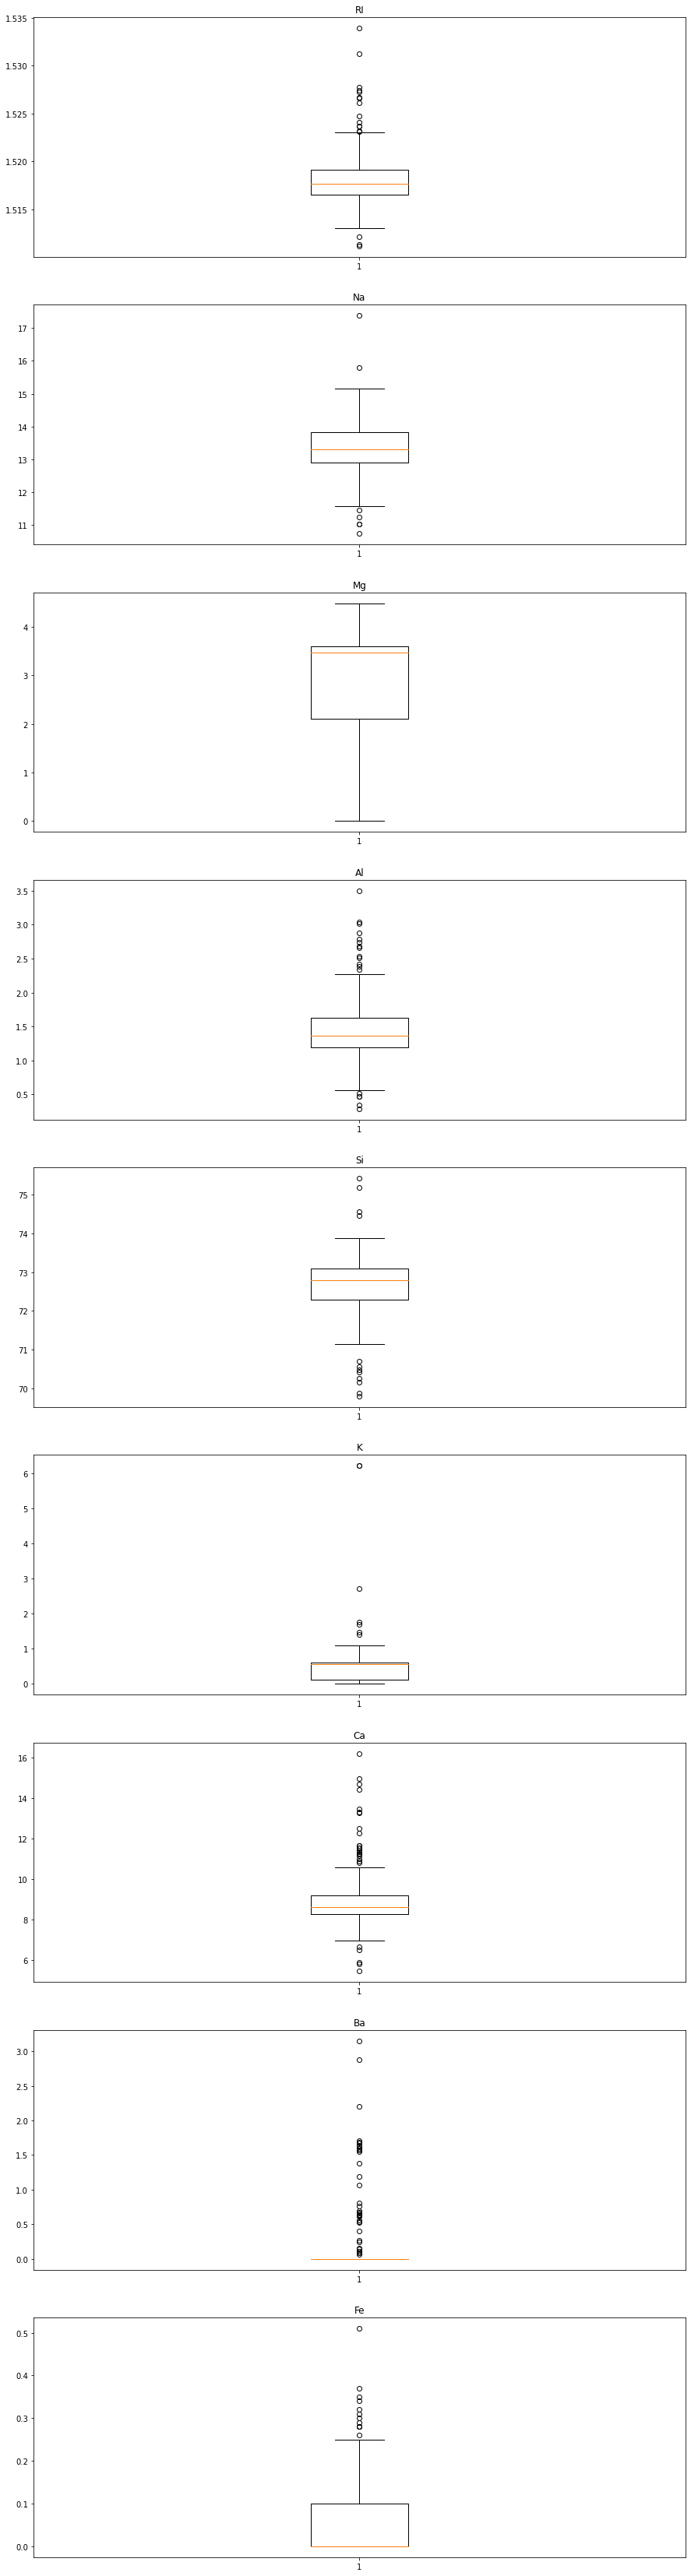

In [236]:
j = 1
plt.figure(figsize=(15, 60))
for i in data.columns[:-1]:
    plt.subplot(9, 1, j)
    plt.title(i)
    plt.boxplot(data[i])
    j += 1

In [237]:
data = data[(data['Si'] >= 70.0) & (data['Si'] <= 75.0)]
data = data[(data['K'] < 0.85)]
data = data[(data['Ca'] >= 6.5) & (data['Ca'] <= 11.5)]
data = data[(data['RI'] >= 1.512) & (data['RI'] <= 1.527)]

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      191 non-null    float64
 1   Na      191 non-null    float64
 2   Mg      191 non-null    float64
 3   Al      191 non-null    float64
 4   Si      191 non-null    float64
 5   K       191 non-null    float64
 6   Ca      191 non-null    float64
 7   Ba      191 non-null    float64
 8   Fe      191 non-null    float64
 9   Type    191 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.4 KB


In [1]:
print('Процент потерянных данных:', round((1 - 191/214) * 100))

Процент потерянных данных: 11


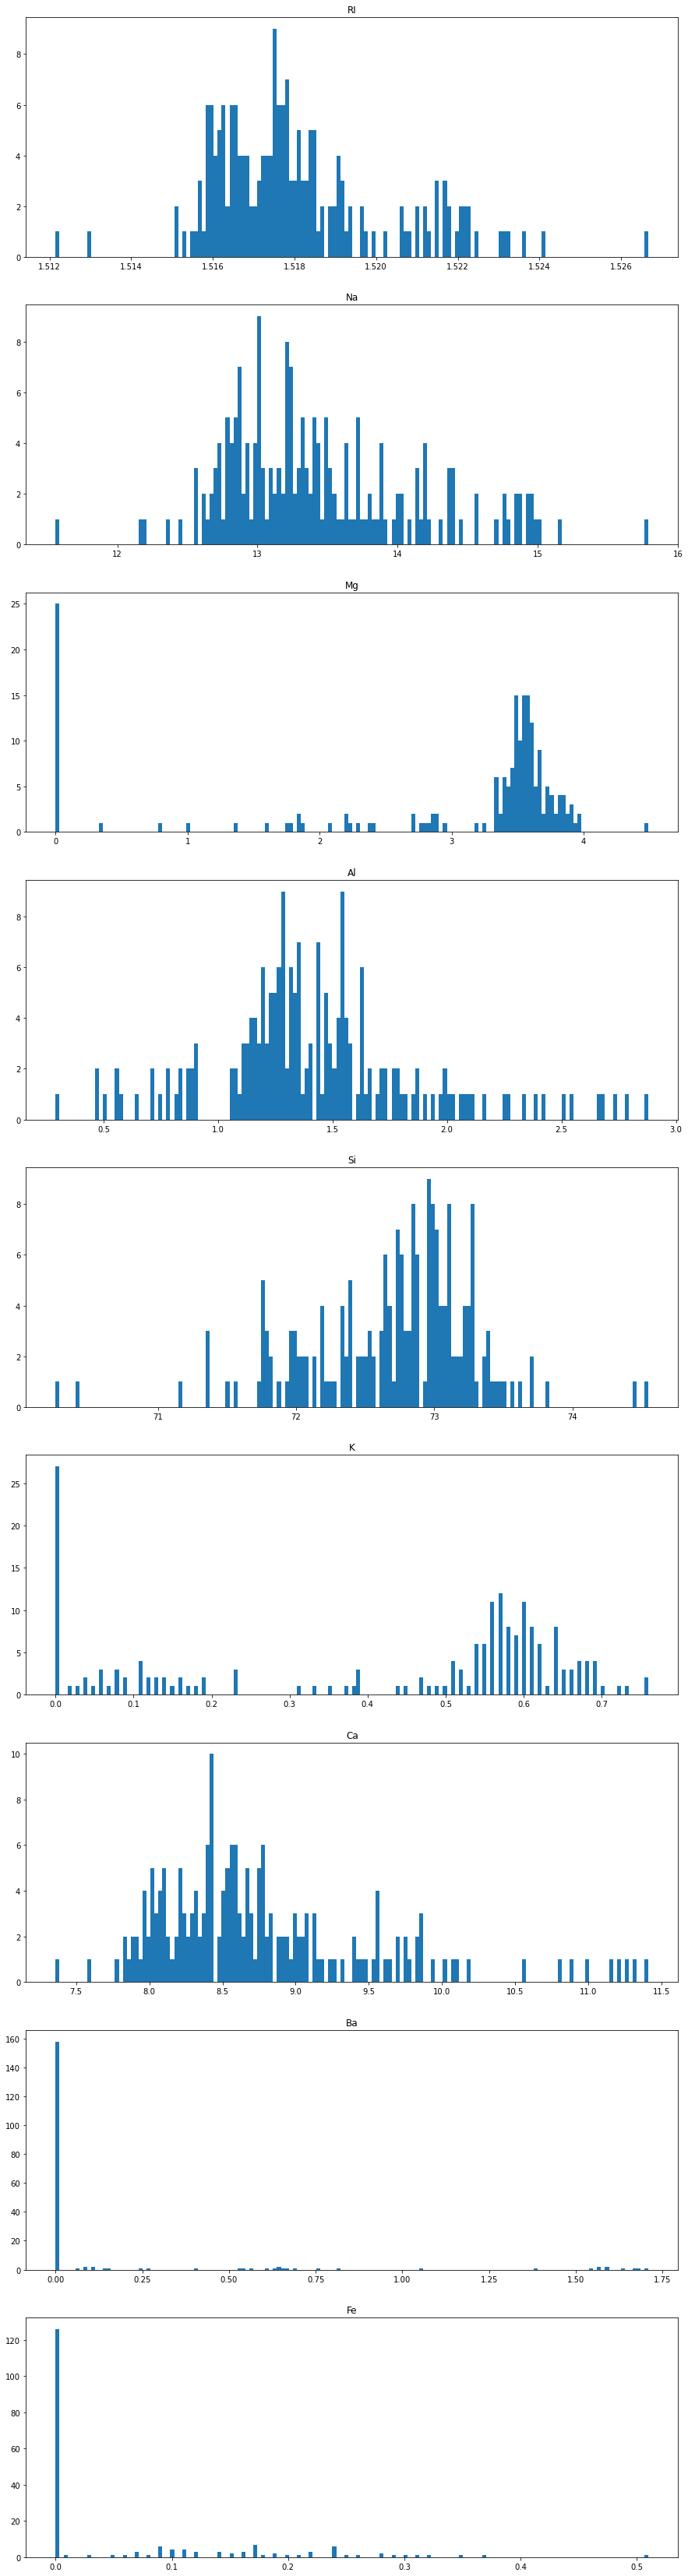

In [239]:
j = 1
plt.figure(figsize=(15, 60))
for i in data.columns[:-1]:
    plt.subplot(9, 1, j)
    plt.title(i)
    plt.hist(data[i], bins = 150)
    j += 1

In [240]:
acc(data)

0.7782051282051282

In [241]:
data = pd.read_csv('glass.csv')
X = data.drop(columns = 'Type')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
model = IsolationForest()
model.fit(X)
data = data[(model.predict(X) == 1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      192 non-null    float64
 1   Na      192 non-null    float64
 2   Mg      192 non-null    float64
 3   Al      192 non-null    float64
 4   Si      192 non-null    float64
 5   K       192 non-null    float64
 6   Ca      192 non-null    float64
 7   Ba      192 non-null    float64
 8   Fe      192 non-null    float64
 9   Type    192 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.5 KB


In [2]:
print('Процент потерянных данных:', round((1 - 192/214) * 100))

Процент потерянных данных: 10


In [242]:
acc(data)

0.7884615384615387

In [243]:
data = pd.read_csv('glass.csv')
X = data.drop(columns = 'Type')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
model = OneClassSVM(nu=0.08, gamma=0.35)
model.fit(X)
data = data[(model.predict(X) == 1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      180 non-null    float64
 1   Na      180 non-null    float64
 2   Mg      180 non-null    float64
 3   Al      180 non-null    float64
 4   Si      180 non-null    float64
 5   K       180 non-null    float64
 6   Ca      180 non-null    float64
 7   Ba      180 non-null    float64
 8   Fe      180 non-null    float64
 9   Type    180 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.5 KB


In [3]:
print('Процент потерянных данных:', round((1 - 180/214) * 100))

Процент потерянных данных: 16


In [244]:
acc(data)

0.7999999999999999

In [251]:
data = pd.read_csv('glass.csv')
X = data.drop(columns = 'Type')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
model = DBSCAN(eps=2.5, min_samples=30).fit(X)
data = data[(model.labels_ == 0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      182 non-null    float64
 1   Na      182 non-null    float64
 2   Mg      182 non-null    float64
 3   Al      182 non-null    float64
 4   Si      182 non-null    float64
 5   K       182 non-null    float64
 6   Ca      182 non-null    float64
 7   Ba      182 non-null    float64
 8   Fe      182 non-null    float64
 9   Type    182 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.6 KB


In [4]:
print('Процент потерянных данных:', round((1 - 182/214) * 100))

Процент потерянных данных: 15


In [252]:
acc(data)

0.7837837837837838

## Сформулируйте выводы по проделанной работе.
### а) Кратко опишите, какие преобразования были сделаны с данными.
### b) Сравните точность двух моделей.
### c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

## Вывод:
### 1) Насчёт преобразований. На основе гистограмм по каждому признаку можно увидеть на некоторых что-то похожее на нормальное распределение, либо явно выбивающиеся от остальных значения. Очистил от от явно выбивающихся значений данные. Это графический метод. Далее для сравнения отдельно изоляционный лес, метод использовал одноклассовый метод опорных векторов, DBSCAN. Для последнего параметры подбирались таким образом, чтобы процент потери данных был около 15 для сохранения достаточного количества данных для обучения.
### 2) При очищении данных от выбросов точность оказалась больше
### 3) Данные от выбросов нужно чистить для увеличения метрики качества модели, её точности и качества. Также позволяет на этапе внесения новых данных автоматически чистить их от выбросов в случае SVMa, DBSCANa и изоляционного леса. Плюсы: всё, что написано до этого. Минусы: уменьшение количества данных, что может пагубно сказаться на обучении при малом объёме, возможные ошибки при чистке(засчитать наблюдение, не являющееся выбросом, как таковое).